In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import polimi.shooting as shooting
import polimi.systems as systems

#### Verify that the (rescaled) period is unitary

In [2]:
autonomous = False
epsilon = 0.001
if autonomous:
    T = 2*np.pi
    A = 0
else:
    A = 1.2
    T = 10.
tend = 1500.
y0_ref = np.array([2,-3])
reltol = 1e-6
abstol = 1e-8*np.ones(y0_ref.shape)
ref = solve_ivp(lambda t,y: T*systems.vdp(t*T,y,epsilon,[A],[T]),[0,tend],y0_ref,
                    method='BDF',jac=lambda t,y: systems.vdp_jac(t,y,epsilon),
                    events=systems.y1min,atol=abstol,rtol=reltol)

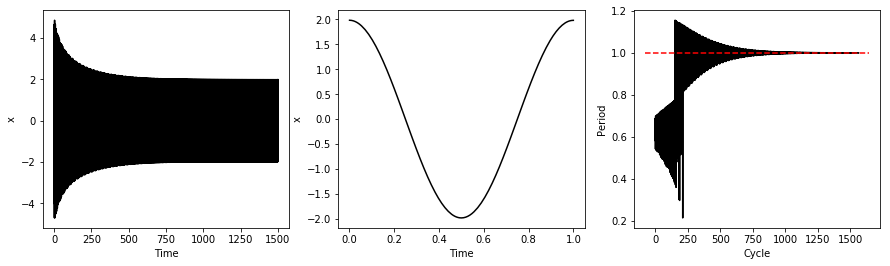

In [3]:
plt.figure(figsize=[15,4])
plt.subplot(1,3,1)
plt.plot(ref['t'],ref['y'][0,:],'k')
plt.xlabel('Time')
plt.ylabel('x')
#
idx = ref['t'] >= tend-1
plt.subplot(1,3,2)
plt.plot(ref['t'][idx]-tend+1,ref['y'][0,idx],'k')
plt.xlabel('Time')
plt.ylabel('x')
#
plt.subplot(1,3,3)
plt.plot(np.diff(ref['t_events'][0]),'k')
plt.plot(plt.xlim(),[1,1],'r--')
plt.xlabel('Cycle')
plt.ylabel('Period')
plt.show()

#### Apply two sinusoidal forcing terms with different periods

In [4]:
epsilon = 0.001
A = [1.2,1.2]
T = [10.,100.]
tend = 20000.
y0_ref = np.array([2,-3])
reltol = 1e-6
abstol = 1e-8*np.ones(y0_ref.shape)
ref = solve_ivp(lambda t,y: systems.vdp(t,y,epsilon,A,T),[0,tend],y0_ref,
                method='RK45',
                atol=abstol,rtol=reltol)

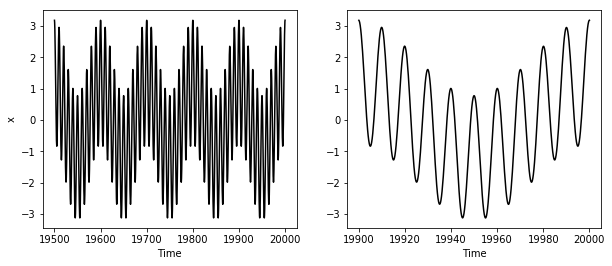

(3.187493,-0.005534)


In [5]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
idx = ref['t'] > tend-5*np.max(T)
plt.plot(ref['t'][idx],ref['y'][0][idx],'k')
plt.xlabel('Time')
plt.ylabel('x')
plt.subplot(1,2,2)
idx = ref['t'] > tend-10*np.min(T)
plt.plot(ref['t'][idx],ref['y'][0][idx],'k')
plt.xlabel('Time')
plt.show()
print('(%f,%f)' % tuple(ref['y'][:,-1]))

#### Shooting on the autonomous Van der Pol oscillator

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


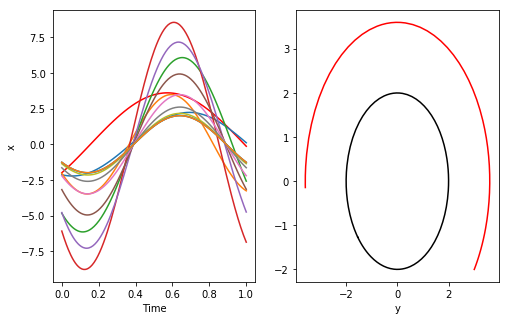

T = 6.28318.
eig(Phi) = (1.000001,0.993746).
Number of iterations: 13.


In [6]:
autonomous = True
with_jac = True
epsilon = 0.001
T = [2*np.pi]
A = [0]
y0_guess = [-2,3]
T_guess = 0.6*T[0]
plt.figure(figsize=(8,5))
if with_jac:
    y0_opt,T,phi,n_iter = shooting.shooting(lambda t,y: systems.vdp(t,y,epsilon,A,T),
                                            y0_guess, T_guess, autonomous, 
                                            lambda t,y: systems.vdp_jac(t,y,epsilon), do_plot=True)
else:
    y0_opt,T,phi,n_iter = shooting.shooting(lambda t,y: systems.vdp(t,y,epsilon,A,T),
                                            y0_guess, T_guess, autonomous, do_plot=True)
floquet_multi,_ = np.linalg.eig(phi)
print('T = %g.' % T)
print('eig(Phi) = (%f,%f).' % tuple(floquet_multi))
print('Number of iterations: %d.' % n_iter)

#### Shooting on the forced Van der Pol oscillator

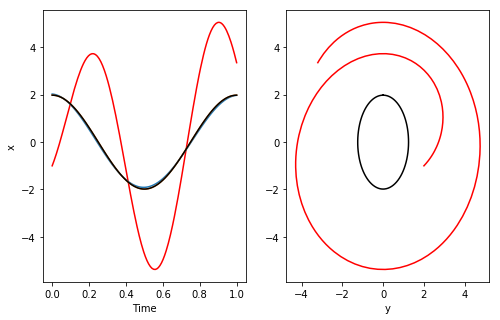

Number of iterations: 4.


In [7]:
autonomous = False
with_jac = True
epsilon = 0.001
T = [10.]
A = [1.2]
y0_guess = [-1,2]
plt.figure(figsize=(8,5))
if with_jac:
    y0_opt,phi,n_iter = shooting.shooting(lambda t,y: systems.vdp(t,y,epsilon,A,T), 
                                          y0_guess, T[0], autonomous, 
                                          lambda t,y: systems.vdp_jac(t,y,epsilon), do_plot=True)
else:
    y0_opt,phi,n_iter = shooting.shooting(lambda t,y: systems.vdp(t,y,epsilon,A,T),
                                          y0_guess, T[0], autonomous, do_plot=True)
print('Number of iterations: %d.' % n_iter)

#### Shooting on the forced Van der Pol oscillator with two sinusoidal terms

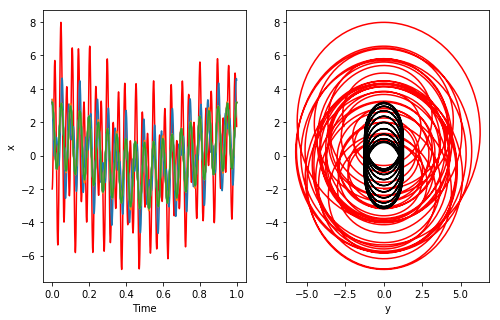

Number of iterations: 14.


In [8]:
autonomous = False
with_jac = True
epsilon = 0.001
T = [10.,200.]
A = [1.2,1.2]
# a point on the steady-state cycle
pt_on_cycle = np.array([3.187493,-0.005534])
y0_guess = [-2,0]
plt.figure(figsize=(8,5))
if with_jac:
    y0_opt,phi,n_iter = shooting.shooting(lambda t,y: systems.vdp(t,y,epsilon,A,T), 
                                          y0_guess, np.max(T), autonomous, 
                                          lambda t,y: systems.vdp_jac(t,y,epsilon),
                                          max_iter=100, tol=1e-7, do_plot=True)
else:
    y0_opt,phi,n_iter = shooting.shooting(lambda t,y: systems.vdp(t,y,epsilon,A,T),
                                          y0_guess, np.max(T), autonomous, jac=None,
                                          max_iter=300, do_plot=True)
print('Number of iterations: %d.' % n_iter)